In [135]:
## Program developed for graphing and interpreting brain wave results

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
import os
import csv
from sklearn.model_selection import train_test_split

In [258]:
path_happy = "../../data/3-Happiness/"
path_sad = "../../data/6-Neutral/"

In [259]:
def find_files(PATH):
    """
    Finds all the files in a particular directory. Return only .csv files.
    """
    files = []
    for r, d, f in os.walk(PATH):
        for file in f:
            if '.csv' in file:
                files.append(os.path.join(r, file).replace("\\","/"))
    return files

In [260]:
files_happy = find_files(path_happy)
files_sad = find_files(path_sad)

In [261]:
def remove_meta_data(PATH):
    """
    Return:
    1. Changes in Electric potential based on Unix timestamp from
        the 5 channels of the Emotiv headset. 2 channels from the Frontal Lobe, 
        1 channel from the parietal lobe, and 2 from temporal lobe.
    2. Pandas Dataframe of the data reflected from (1).
    """
    reader = csv.reader(open(PATH, "rt"), delimiter='\t')
    i = 0
    one_file_data = []
    for line in reader:
        if(i > 0):
            one_file_data.append(line)
        i += 1
    one_file_data = np.array(one_file_data)
    columns = one_file_data[0][0].split(",")[3:8]
    row_data = []
    for rows in one_file_data[1:]:
        row_data.append(rows[0].split(",")[3:8])
    dataframe = pd.DataFrame(row_data, columns=columns)
    return np.array(row_data), dataframe

In [262]:
def data_DF_dir(list_PATH):
    """
    Returns all the data from a given set of path files and its associated pandas dataframe object.
    """
    raw_data = []
    dataframes = []
    for file in list_PATH:
        rd, dfob = remove_meta_data(file)
        raw_data.append(rd)
        dataframes.append(dfob)
    return raw_data, dataframes

In [263]:
data_HAPPY, df_HAPPY = data_DF_dir(files_happy)

In [264]:
data_SAD, df_SAD = data_DF_dir(files_sad)

In [265]:
test_1 = data_HAPPY[0]

In [272]:
dxt = []
dxt2 = []
dxt3 = []
dxt4 = []
for x in data_SAD[0]:
    dxt.append(x[1])
for x in data_SAD[1]:
    dxt4.append(x[1])    
for x in data_HAPPY[0]:
    dxt2.append(x[1])
for x in data_HAPPY[4]:
    dxt3.append(x[1])

In [273]:
start = 100
end = 1000

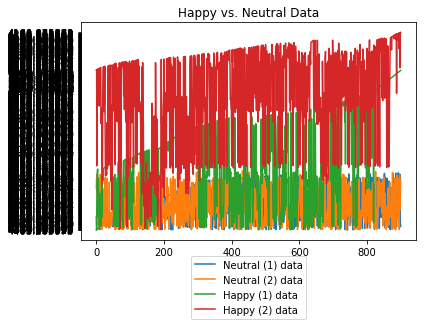

In [275]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dxt[start:end], label='Neutral (1) data')
ax.plot(dxt4[start:end], label='Neutral (2) data')
ax.plot(dxt2[start:end], label='Happy (1) data')
ax.plot(dxt3[start:end], label='Happy (2) data')

plt.title('Happy vs. Neutral Data')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.show()